### 6.Dane tekstowe i API
- Proste operacje tekstowe
- Łączenie z API i pobieranie danych
- Pozyskiwanie ze stron (requests)
- Parsowanie stron internetowych (BeautifulSoup)
- Przetwarzanie i zapisywanie


#### Proste operacje tekstowe

In [1]:
text = 'Python'

In [2]:
print(dir(text))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [3]:
napis = 'python'
napis

'python'

In [4]:
napis.title()

'Python'

In [5]:
text

'Python'

In [7]:
text.lower()
# Tomek
# TOMEK
# tomek

'python'

In [8]:
text.upper()

'PYTHON'

In [9]:
text = 'Python '

In [10]:
text.strip() # usunięcie białych znaków

'Python'

In [11]:
napis = '1,3'

In [12]:
napis.replace(',','.')

'1.3'

In [13]:
napis = 'python'

In [15]:
len(napis) == 6

True

In [16]:
napis = 'python'

In [17]:
napis.count('p')

1

In [18]:
numer = '123,345,45'

In [20]:
numer.split(',')

['123', '345', '45']

In [21]:
telefon = '999-999-999'

In [22]:
telefon.replace('-', '')

'999999999'

In [31]:
telefon = '999-999-999'
telefon = telefon.split('-')
telefon

['999', '999', '999']

In [25]:
telefon = '999-999-999'
telefon = telefon.split('-')
'-'.join(telefon)

'999-999-999'

In [27]:
words = ['sport', 'python', 'free', 'time']
joined_words = '#'.join(words)
joined_words

'sport#python#free#time'

##### Przykład

In [32]:
'0123456789'
wynik = '01-23-45-67-89'

In [37]:
s = "0123456789"

In [38]:
s[0:2]

'01'

In [42]:
l = []

for i in range(0,len(s), 2):
    l.append(s[i:i+2])
'-'.join(l)

'01-23-45-67-89'

In [43]:
s = "0123456789"
result = '-'.join([s[i:i+2] for i in range(0, len(s), 2)])
result

'01-23-45-67-89'

In [48]:
napis = 'prog.py'
napis.upper().split('.')

['PROG', 'PY']

#### o cięciu łańcuchów tekstowych słów kilka

In [49]:
lancuch="123456789"

In [50]:
lancuch[2]

'3'

In [51]:
lancuch[-2]

'8'

In [52]:
lancuch[2:5]

'345'

In [53]:
lancuch[0:6:2]

'135'

In [54]:
import pandas as pd

In [55]:
s = pd.Series([3, 1, 2.71, -10], index=['a', 'a', 'c', 'd'])
s

a     3.00
a     1.00
c     2.71
d   -10.00
dtype: float64

In [56]:
s.apply(lambda x: str(x).replace('.', ','))

a      3,0
a      1,0
c     2,71
d    -10,0
dtype: object

### Łączenie z API i pobieranie danych

Łączenie się z API (Application Programming Interface) i pobieranie danych to element analizy danych, który pozwala na dostęp do dynamicznych i często aktualizowanych źródeł informacji. API umożliwiają programistom komunikację z różnymi usługami internetowymi, takimi jak serwisy pogodowe, platformy społecznościowe czy bazy danych finansowych.

#### Podstawy łączenia się z API

API zazwyczaj działają na zasadzie wysyłania żądań HTTP i otrzymywania odpowiedzi, zazwyczaj w formacie JSON lub XML. W Pythonie najpopularniejszą biblioteką do wysyłania żądań HTTP jest `requests`.



### Podsumowanie

Łączenie się z API i pobieranie danych jest fundamentalnym aspektem analizy danych, pozwalającym na dostęp do dynamicznych i aktualizowanych źródeł informacji. Korzystanie z biblioteki `requests` w Pythonie umożliwia łatwe wysyłanie zapytań HTTP GET i POST, zarówno do publicznych API, jak i tych wymagających autoryzacji. Dzięki temu można pobierać, przetwarzać i analizować dane z różnorodnych źródeł, co jest kluczowe dla nowoczesnych aplikacji analitycznych i naukowych.

### https://api.nbp.pl/

In [57]:
import pandas as pd

In [58]:
a = pd.read_json('http://api.nbp.pl/api/exchangerates/rates/a/USD/')
a

,table,currency,code,rates
0,A,dolar amerykański,USD,"{'no': '058/A/NBP/2025', 'effectiveDate': '202..."


In [65]:
aktualna_cena_dolara = a['rates'].values[0]['mid']
aktualna_cena_dolara

3.8578

In [66]:
pd.read_json('http://api.nbp.pl/api/cenyzlota/')

,data,cena
0,2025-03-26,375.21


In [67]:
cena_złota_dzis = pd.read_json('http://api.nbp.pl/api/cenyzlota/')
cena_złota_dzis.cena

0    375.21
Name: cena, dtype: float64

'2025-03-25'

In [73]:
waluta = 'USD'
start = '2025-01-01'
end = (pd.Timestamp.today() - pd.Timedelta(days=1)).strftime('%Y-%m-%d')

In [74]:
query = 'http://api.nbp.pl/api/exchangerates/rates/a/' + waluta +'/' + start + '/' + end + '/'

In [75]:
zapytanie = pd.read_json(query)
zapytanie

,table,currency,code,rates
0,A,dolar amerykański,USD,"{'no': '001/A/NBP/2025', 'effectiveDate': '202..."
1,A,dolar amerykański,USD,"{'no': '002/A/NBP/2025', 'effectiveDate': '202..."
2,A,dolar amerykański,USD,"{'no': '003/A/NBP/2025', 'effectiveDate': '202..."
3,A,dolar amerykański,USD,"{'no': '004/A/NBP/2025', 'effectiveDate': '202..."
4,A,dolar amerykański,USD,"{'no': '005/A/NBP/2025', 'effectiveDate': '202..."
5,A,dolar amerykański,USD,"{'no': '006/A/NBP/2025', 'effectiveDate': '202..."
6,A,dolar amerykański,USD,"{'no': '007/A/NBP/2025', 'effectiveDate': '202..."
7,A,dolar amerykański,USD,"{'no': '008/A/NBP/2025', 'effectiveDate': '202..."
8,A,dolar amerykański,USD,"{'no': '009/A/NBP/2025', 'effectiveDate': '202..."
9,A,dolar amerykański,USD,"{'no': '010/A/NBP/2025', 'effectiveDate': '202..."


In [80]:
k = zapytanie['rates'].values

In [90]:
zapytanie['rates']

0     {'no': '001/A/NBP/2025', 'effectiveDate': '202...
1     {'no': '002/A/NBP/2025', 'effectiveDate': '202...
2     {'no': '003/A/NBP/2025', 'effectiveDate': '202...
3     {'no': '004/A/NBP/2025', 'effectiveDate': '202...
4     {'no': '005/A/NBP/2025', 'effectiveDate': '202...
5     {'no': '006/A/NBP/2025', 'effectiveDate': '202...
6     {'no': '007/A/NBP/2025', 'effectiveDate': '202...
7     {'no': '008/A/NBP/2025', 'effectiveDate': '202...
8     {'no': '009/A/NBP/2025', 'effectiveDate': '202...
9     {'no': '010/A/NBP/2025', 'effectiveDate': '202...
10    {'no': '011/A/NBP/2025', 'effectiveDate': '202...
11    {'no': '012/A/NBP/2025', 'effectiveDate': '202...
12    {'no': '013/A/NBP/2025', 'effectiveDate': '202...
13    {'no': '014/A/NBP/2025', 'effectiveDate': '202...
14    {'no': '015/A/NBP/2025', 'effectiveDate': '202...
15    {'no': '016/A/NBP/2025', 'effectiveDate': '202...
16    {'no': '017/A/NBP/2025', 'effectiveDate': '202...
17    {'no': '018/A/NBP/2025', 'effectiveDate': 

In [92]:
l = []
data = []
for zap1 in zapytanie['rates']:
    l.append(zap1['mid'])
    data.append(zap1['effectiveDate'])

In [81]:
l = []
data = []
for i, zap1 in enumerate(zapytanie['rates']):
    l.append(zap1['mid'])
    data.append(zap1['effectiveDate'])



In [94]:
test = pd.DataFrame(l, data).reset_index()
test.columns = ['data', 'cena']
test

,data,cena
0,2025-01-02,4.1219
1,2025-01-03,4.1512
2,2025-01-07,4.0770
3,2025-01-08,4.1335
4,2025-01-09,4.1523
5,2025-01-10,4.1415
6,2025-01-13,4.1904
7,2025-01-14,4.1658
8,2025-01-15,4.1330
9,2025-01-16,4.1433


In [109]:
kod = (input('Podaj kod waluty: '))

Podaj kod waluty:  EUR


In [110]:
kod

'EUR'

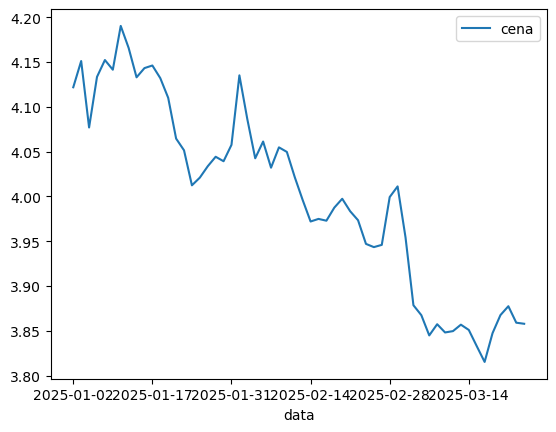

In [104]:
test.set_index('data').plot();

### requests

In [105]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [106]:
import requests

In [111]:
BASE_URL = "https://api.nbp.pl/api/exchangerates/tables/a/?format=json"
OBSLUGIWANE_WALUTY = ("EUR", "CHF", "USD", "IDR")

res = requests.get("https://api.nbp.pl/api/exchangerates/tables/a/?format=json")

odpowiedz = res.json()

In [113]:
tabela_kursow = odpowiedz[0]['rates']
tabela_kursow

[{'currency': 'bat (Tajlandia)', 'code': 'THB', 'mid': 0.1136},
 {'currency': 'dolar amerykański', 'code': 'USD', 'mid': 3.8578},
 {'currency': 'dolar australijski', 'code': 'AUD', 'mid': 2.4295},
 {'currency': 'dolar Hongkongu', 'code': 'HKD', 'mid': 0.4961},
 {'currency': 'dolar kanadyjski', 'code': 'CAD', 'mid': 2.6943},
 {'currency': 'dolar nowozelandzki', 'code': 'NZD', 'mid': 2.2082},
 {'currency': 'dolar singapurski', 'code': 'SGD', 'mid': 2.8836},
 {'currency': 'euro', 'code': 'EUR', 'mid': 4.1664},
 {'currency': 'forint (Węgry)', 'code': 'HUF', 'mid': 0.010446},
 {'currency': 'frank szwajcarski', 'code': 'CHF', 'mid': 4.3655},
 {'currency': 'funt szterling', 'code': 'GBP', 'mid': 4.9879},
 {'currency': 'hrywna (Ukraina)', 'code': 'UAH', 'mid': 0.0925},
 {'currency': 'jen (Japonia)', 'code': 'JPY', 'mid': 0.025634},
 {'currency': 'korona czeska', 'code': 'CZK', 'mid': 0.1674},
 {'currency': 'korona duńska', 'code': 'DKK', 'mid': 0.5585},
 {'currency': 'korona islandzka', 'code'

In [114]:
for el in tabela_kursow:
    if el["code"] in OBSLUGIWANE_WALUTY:
        print(f'Aktualny kurs {el["currency"]} ({el["code"]}) = {el["mid"]}')

Aktualny kurs dolar amerykański (USD) = 3.8578
Aktualny kurs euro (EUR) = 4.1664
Aktualny kurs frank szwajcarski (CHF) = 4.3655
Aktualny kurs rupia indonezyjska (IDR) = 0.00023247


In [115]:
#API z książkami

import requests

def get_book_info(isbn):
    url = f'https://openlibrary.org/api/books?bibkeys=ISBN:{isbn}&format=json&jscmd=data'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        book_key = f'ISBN:{isbn}'
        if book_key in data:
            book = data[book_key]
            title = book.get('title', 'Brak tytułu')
            authors = ', '.join([author['name'] for author in book.get('authors', [])])
            number_of_pages = book.get('number_of_pages', 'Brak danych')
            print(f"Tytuł: {title}")
            print(f"Autorzy: {authors}")
            print(f"Liczba stron: {number_of_pages}")
        else:
            print(f"Brak danych dla ISBN: {isbn}")
    else:
        print(f"Błąd pobierania danych: {response.status_code}")

get_book_info('9788324626946')


Tytuł: Python Wprowadzenie (Polish Edition)
Autorzy: 
Liczba stron: Brak danych


In [117]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### Parsowanie stron internetowych (BeautifulSoup)

Parsowanie stron internetowych to proces analizowania kodu HTML i wyodrębniania z niego interesujących nas informacji. W Pythonie do tego celu często używa się biblioteki BeautifulSoup, która jest częścią pakietu BeautifulSoup4 (bs4). Jest to narzędzie umożliwiające łatwe i wygodne przetwarzanie kodu HTML i XML, co jest nieocenione w web scrapingu.

#### Instalacja BeautifulSoup

Aby zainstalować BeautifulSoup oraz bibliotekę `requests`, która będzie nam potrzebna do pobierania zawartości stron, należy użyć pip:

```bash
pip install beautifulsoup4 requests
```

#### Podstawy użycia BeautifulSoup

1. **Pobieranie zawartości strony**: Najpierw należy pobrać zawartość strony internetowej za pomocą biblioteki `requests`.

2. **Tworzenie obiektu BeautifulSoup**: Zaimportuj zawartość HTML do obiektu BeautifulSoup, który umożliwia łatwe przeszukiwanie i nawigowanie po strukturze DOM.

3. **Nawigacja i wyszukiwanie w drzewie DOM**: Używaj metod BeautifulSoup do wyszukiwania i ekstrakcji interesujących cię elementów.



#### Podstawowe metody i funkcje BeautifulSoup

- **find()**: Zwraca pierwszy element, który pasuje do zapytania.
- **find_all()**: Zwraca wszystkie elementy, które pasują do zapytania.
- **get_text()**: Zwraca tekst wewnątrz elementu HTML.

```python
# Znalezienie pierwszego elementu <p>
first_paragraph = soup.find('p')
print(first_paragraph.get_text())

# Znalezienie wszystkich linków (elementy <a>)
all_links = soup.find_all('a')
for link in all_links:
    print(link['href'])  # Wypisanie wartości atrybutu 'href'
```

In [116]:
from bs4 import BeautifulSoup

In [118]:
html_doc = """
<html>
    <head>
        <title>Tytuł strony</title>
    </head>
    <body>
        <h1>Witaj, świecie!</h1>
        <p id="paragraf1">To jest pierwszy paragraf.</p>
        <p id="paragraf2">To jest drugi paragraf.</p>
    </body>
</html>
"""

In [119]:
html_doc

'\n<html>\n    <head>\n        <title>Tytuł strony</title>\n    </head>\n    <body>\n        <h1>Witaj, świecie!</h1>\n        <p id="paragraf1">To jest pierwszy paragraf.</p>\n        <p id="paragraf2">To jest drugi paragraf.</p>\n    </body>\n</html>\n'

In [120]:
soup = BeautifulSoup(html_doc)

In [121]:
soup

<html>
<head>
<title>Tytuł strony</title>
</head>
<body>
<h1>Witaj, świecie!</h1>
<p id="paragraf1">To jest pierwszy paragraf.</p>
<p id="paragraf2">To jest drugi paragraf.</p>
</body>
</html>

In [122]:
# Znalezienie pierwszego wystąpienia tagu <title>
soup.find('title')

<title>Tytuł strony</title>

In [125]:
# Znalezienie elementu według id
soup.find(id='paragraf1').string

'To jest pierwszy paragraf.'

In [126]:
# Znalezienie wszystkich elementów <p>
paragrafy = soup.find_all('p')
paragrafy

[<p id="paragraf1">To jest pierwszy paragraf.</p>,
 <p id="paragraf2">To jest drugi paragraf.</p>]

In [127]:
for p in paragrafy:
    print(p.text)

To jest pierwszy paragraf.
To jest drugi paragraf.


In [130]:
import requests
from bs4 import BeautifulSoup

# Adres URL strony, którą chcemy sparsować
# url = "http://example.com/blog"
url = "https://miroslawmamczur.pl/blog/"
# url = "https://na-talerzu.pl/"




# Wysyłanie zapytania HTTP GET do strony
response = requests.get(url)

# Sprawdzenie, czy zapytanie zakończyło się sukcesem
if response.status_code == 200:
    # Utworzenie obiektu BeautifulSoup z pobranej zawartości HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Wyszukiwanie wszystkich elementów <h2> (przykładowo, jeśli tytuły artykułów są w <h2>)
    titles = soup.find_all('h2')

    # Iteracja po znalezionych elementach i wypisanie ich tekstu
    for title in titles:
        print(title.get_text())
else:
    print(f"Failed to retrieve the webpage: {response.status_code}")

Jak działa las losowy (random forest)?
Czym jest i jak działa drzewo decyzyjne?
#025 Wykres roju (swarmplot)
Czym jest Docker? I jak uruchomić model uczenia maszynowego w kontenerze?
Jak serwować modele ML za pomocą FastAPI?
Czym jest API i jakie są jego rodzaje?
#024 Wykres ridgeline (ridgeline plot)
Co to jest uczenie federacyjne (Federated Learning)?
Jak działa regresja logistyczna?
Googluj jak PRO


In [132]:
import requests
from bs4 import BeautifulSoup

# Funkcja do pobierania tytułów artykułów z jednej strony
def get_titles_from_page(url):
    titles = []

    # Wysyłanie zapytania HTTP GET do strony
    response = requests.get(url)

    # Sprawdzenie, czy zapytanie zakończyło się sukcesem
    if response.status_code == 200:
        # Utworzenie obiektu BeautifulSoup z pobranej zawartości HTML
        soup = BeautifulSoup(response.content, 'html.parser')

        # Wyszukiwanie wszystkich elementów <h2> (przykładowo, jeśli tytuły artykułów są w <h2>)
        for title in soup.find_all('h2'):
            titles.append(title.get_text())
        
        # Znalezienie linku do następnej strony
        next_page = soup.find('a', {'rel': 'next'})
        if next_page:
            next_url = next_page['href']
            if not next_url.startswith('http'):
                # Jeśli link jest względny, przekształcamy go na absolutny
                next_url = requests.compat.urljoin(url, next_url)
            titles += get_titles_from_page(next_url)
    else:
        print(f"Failed to retrieve the webpage: {response.status_code}")

    return titles

# URL strony startowej bloga
start_url = "https://miroslawmamczur.pl/blog/"

# Pobieranie tytułów artykułów ze wszystkich stron
all_titles = get_titles_from_page(start_url)

# Wyświetlanie tytułów
for title in all_titles:
    print(title)

Jak działa las losowy (random forest)?
Czym jest i jak działa drzewo decyzyjne?
#025 Wykres roju (swarmplot)
Czym jest Docker? I jak uruchomić model uczenia maszynowego w kontenerze?
Jak serwować modele ML za pomocą FastAPI?
Czym jest API i jakie są jego rodzaje?
#024 Wykres ridgeline (ridgeline plot)
Co to jest uczenie federacyjne (Federated Learning)?
Jak działa regresja logistyczna?
Googluj jak PRO
#023 Wykres warstwowy (area chart)
ChatGPT – wywiad o AI
Dall-E2 vs Midjourney vs Stable Diffusion
NannyML – walidacja modelu bez danych rzeczywistych (ground truth)!
#022 Wykres sunburst
Czym jest i jak zbadać dryf modelu (model drift)?
50+ repozytoriów GitHub, które zbierają o AI to, co najlepsze!
#021 Wykres lizakowy (lollipop chart)
Czym jest wybór zmiennych (feature selection)? 16 metod, które warto znać!
Wyrażenia regularne – czym są i jak pisać własne regex’y?
#020 Diagram cięciw (chord diagram)
Las izolacji (Isolation forest) – jak to działa?
Wykrywanie anomalii – na czym polega, 

## Zadanie: Podeślij mi excel z wszystkimi polskimi poetami.

In [133]:
import time
import requests
from bs4 import BeautifulSoup

In [134]:
#zczytanie wszystkich linków w zbiorach wierszy
page_list =["https://pl.wikisource.org/wiki/Kategoria:Polscy_poeci",
           "https://pl.wikisource.org/w/index.php?title=Kategoria:Polscy_poeci&pagefrom=Laskowski%2C+Kazimierz%0AKazimierz+Laskowski#mw-pages",
           "https://pl.wikisource.org/w/index.php?title=Kategoria:Polscy_poeci&pagefrom=Wolski%2C+Wac%C5%82aw%0AWac%C5%82aw+Wolski#mw-pages"]


In [135]:
page = requests.get("https://pl.wikisource.org/wiki/Kategoria:Polscy_poeci")
page

<Response [200]>

In [136]:
page.content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref--excluded vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" lang="pl" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Kategoria:Polscy poeci - Wiki\xc5\xbar\xc3\xb3d\xc5\x82a, wolna biblioteka</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-

In [137]:
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref--excluded vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" dir="ltr" lang="pl">
<head>
<meta charset="utf-8"/>
<title>Kategoria:Polscy poeci - Wikiźródła, wolna biblioteka</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featur

In [138]:
soup.find_all('a')

[<a class="mw-jump-link" href="#bodyContent">Przejdź do zawartości</a>,
 <a accesskey="z" href="/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Strona_g%C5%82%C3%B3wna" title="Przejdź na stronę główną [z]"><span>Strona główna</span></a>,
 <a href="/wiki/Specjalna:Wszystkie_strony"><span>Indeks tekstów</span></a>,
 <a accesskey="x" href="/wiki/Specjalna:Losowa_bez_podstron/Main" title="Załaduj losową stronę [x]"><span>Losowy tekst</span></a>,
 <a href="/wiki/Specjalna:Strony_specjalne"><span>Strony specjalne</span></a>,
 <a accesskey="r" href="/wiki/Specjalna:Ostatnie_zmiany" title="Lista ostatnich zmian w Wikiźródłach. [r]"><span>Ostatnie zmiany</span></a>,
 <a href="/wiki/Specjalna:Losowa_bez_podstron/Indeks"><span>Losowy indeks</span></a>,
 <a href="/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Zasady_Wiki%C5%BAr%C3%B3de%C5%82"><span>Zasady</span></a>,
 <a href="/wiki/Pomoc:Spis_tre%C5%9Bci" title="Tutaj możesz dowiedzieć się wielu rzeczy."><span>Pomoc</span></a>,
 <a href="/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Skrypto

In [139]:
for a in soup.find_all('a'):
    print(a['href'])

#bodyContent
/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Strona_g%C5%82%C3%B3wna
/wiki/Specjalna:Wszystkie_strony
/wiki/Specjalna:Losowa_bez_podstron/Main
/wiki/Specjalna:Strony_specjalne
/wiki/Specjalna:Ostatnie_zmiany
/wiki/Specjalna:Losowa_bez_podstron/Indeks
/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Zasady_Wiki%C5%BAr%C3%B3de%C5%82
/wiki/Pomoc:Spis_tre%C5%9Bci
/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Skryptorium
/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Tablica_og%C5%82osze%C5%84
/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Wikiprojekt_Proofread
/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Strona_g%C5%82%C3%B3wna
/wiki/Specjalna:Szukaj
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=pl.wikisource.org&uselang=pl
/w/index.php?title=Specjalna:Utw%C3%B3rz_konto&returnto=Kategoria%3APolscy+poeci
/w/index.php?title=Specjalna:Zaloguj&returnto=Kategoria%3APolscy+poeci
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=pl.wikisource.org&uselang=pl
/w/index.php?title=Specjalna:Utw%C3%B3rz_konto&re

In [142]:
page_list

['https://pl.wikisource.org/wiki/Kategoria:Polscy_poeci',
 'https://pl.wikisource.org/w/index.php?title=Kategoria:Polscy_poeci&pagefrom=Laskowski%2C+Kazimierz%0AKazimierz+Laskowski#mw-pages',
 'https://pl.wikisource.org/w/index.php?title=Kategoria:Polscy_poeci&pagefrom=Wolski%2C+Wac%C5%82aw%0AWac%C5%82aw+Wolski#mw-pages']

In [140]:
url_autors = []
 
#start = time.time()
 
for page_url in page_list:
    #wybranie strony do szukania linków z autorami
    page = requests.get(page_url)
    page.encoding = 'ascii'
    soup = BeautifulSoup(page.content, 'html.parser', from_encoding="iso-8859-8")
 
    for a in soup.find_all('a'):
        if a['href'][0:11]=='/wiki/Autor':
            url_autors.append(a['title'])

In [146]:
for a in soup.find_all('a'):
    if a['href'][0:11]=='/wiki/Autor':
        url_autors.append(a['title'])

In [141]:
url_autors

['Autor:Piotr Adamczyk',
 'Autor:Bogusław Adamowicz',
 'Autor:Jan Chrzciciel Albertrandi',
 'Autor:Alx z Poewiki',
 'Autor:Jan Ancuta',
 'Autor:Władysław Ludwik Anczyc',
 'Autor:Józef Andrzejewski',
 'Autor:Karol Antoniewicz',
 'Autor:Mikołaj Bołoz Antoniewicz',
 'Autor:Franciszka Arnsztajnowa',
 'Autor:Adam Asnyk',
 'Autor:Bogumił Aspis',
 'Autor:Krzysztof Kamil Baczyński',
 'Autor:Józef Baka',
 'Autor:Ignacy Baliński',
 'Autor:Karol Baliński',
 'Autor:Michał Bałucki',
 'Autor:Antanas Baranauskas',
 'Autor:Stanisław Barącz',
 'Autor:Stefan Barszczewski',
 'Autor:Artur Bartels',
 'Autor:Maria Bartusówna',
 'Autor:Gustaw Baumritter',
 'Autor:Wiktor Baworowski',
 'Autor:Cyprian Bazylik',
 'Autor:Józefa Bąkowska',
 'Autor:Adam Bełcikowski',
 'Autor:Władysław Bełza',
 'Autor:Wawrzyniec Benzelstjerna-Engeström',
 'Autor:Stanisław Bereś',
 'Autor:Ryszard Będkowski',
 'Autor:Chajim Nachman Bialik',
 'Autor:Edmund Bieder',
 'Autor:Miłosz Biedrzycki',
 'Autor:Bruno Bielawski',
 'Autor:Józef Bie

In [150]:
for x in url_autors:
    print(x[6:])

Piotr Adamczyk
Bogusław Adamowicz
Jan Chrzciciel Albertrandi
Alx z Poewiki
Jan Ancuta
Władysław Ludwik Anczyc
Józef Andrzejewski
Karol Antoniewicz
Mikołaj Bołoz Antoniewicz
Franciszka Arnsztajnowa
Adam Asnyk
Bogumił Aspis
Krzysztof Kamil Baczyński
Józef Baka
Ignacy Baliński
Karol Baliński
Michał Bałucki
Antanas Baranauskas
Stanisław Barącz
Stefan Barszczewski
Artur Bartels
Maria Bartusówna
Gustaw Baumritter
Wiktor Baworowski
Cyprian Bazylik
Józefa Bąkowska
Adam Bełcikowski
Władysław Bełza
Wawrzyniec Benzelstjerna-Engeström
Stanisław Bereś
Ryszard Będkowski
Chajim Nachman Bialik
Edmund Bieder
Miłosz Biedrzycki
Bruno Bielawski
Józef Bielawski
Joachim Bielski
Marcin Bielski
Mikołaj Biernacki
Józef Birkenmajer
Leopold Blumental
Krzysztof Boczkowski
Edmund Bogdanowicz
Franciszek Bohomolec
Norbert Bonczyk
Józef Dunin-Borkowski
Leszek Dunin-Borkowski
Amelia Bortnowska
Elżbieta Bośniacka
Edward Boyé
Stanisław Bratkowski
Mieczysław Braun
Bohdan Breszel
Kazimierz Brodziński
Antoni Bronikowski
Lu

In [152]:
pd.DataFrame([x[6:] for x in url_autors]).to_excel('autorzy.xlsx')